In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | maragogi
Processing Record 4 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | axim
Processing Record 8 of Set 1 | kuche
City not found. Skipping...
Processing Record 9 of Set 1 | langenlois
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | poum
Processing Record 12 of Set 1 | umm kaddadah
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | kutum
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | rawson
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | puerto del rosario
Processing Record 20 of Set 1 | kendari
Processing Record 21 of Set 1 | miri
P

Processing Record 37 of Set 4 | iberia
Processing Record 38 of Set 4 | chapais
Processing Record 39 of Set 4 | aktash
Processing Record 40 of Set 4 | manyana
Processing Record 41 of Set 4 | bengkulu
Processing Record 42 of Set 4 | paucartambo
City not found. Skipping...
Processing Record 43 of Set 4 | castro
Processing Record 44 of Set 4 | topchikha
Processing Record 45 of Set 4 | manokwari
Processing Record 46 of Set 4 | port macquarie
Processing Record 47 of Set 4 | belmonte
Processing Record 48 of Set 4 | ajka
Processing Record 49 of Set 4 | saint george
Processing Record 50 of Set 4 | tiquicheo
Processing Record 1 of Set 5 | georgetown
Processing Record 2 of Set 5 | komsomolskiy
Processing Record 3 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 5 | rusne
Processing Record 5 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 6 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 5 | praia
Processing Record 8 of S

Processing Record 27 of Set 8 | henties bay
Processing Record 28 of Set 8 | manggar
Processing Record 29 of Set 8 | staryy oskol
Processing Record 30 of Set 8 | pemangkat
Processing Record 31 of Set 8 | vostok
Processing Record 32 of Set 8 | la ronge
Processing Record 33 of Set 8 | hrebinka
Processing Record 34 of Set 8 | dano
Processing Record 35 of Set 8 | aranda de duero
Processing Record 36 of Set 8 | lorengau
Processing Record 37 of Set 8 | noratus
Processing Record 38 of Set 8 | sao felix do xingu
Processing Record 39 of Set 8 | kruisfontein
Processing Record 40 of Set 8 | yar-sale
Processing Record 41 of Set 8 | malartic
Processing Record 42 of Set 8 | vicosa do ceara
Processing Record 43 of Set 8 | kununurra
Processing Record 44 of Set 8 | thunder bay
Processing Record 45 of Set 8 | ittiri
Processing Record 46 of Set 8 | ascension
Processing Record 47 of Set 8 | saleaula
City not found. Skipping...
Processing Record 48 of Set 8 | namibe
Processing Record 49 of Set 8 | san juan


Processing Record 19 of Set 12 | muisne
Processing Record 20 of Set 12 | mayo
Processing Record 21 of Set 12 | port-gentil
Processing Record 22 of Set 12 | grand gaube
Processing Record 23 of Set 12 | okhotsk
Processing Record 24 of Set 12 | teahupoo
Processing Record 25 of Set 12 | ayagoz
Processing Record 26 of Set 12 | kiruna
Processing Record 27 of Set 12 | emerald
Processing Record 28 of Set 12 | bindura
Processing Record 29 of Set 12 | grootfontein
Processing Record 30 of Set 12 | coihaique
Processing Record 31 of Set 12 | alofi
Processing Record 32 of Set 12 | ahipara
Processing Record 33 of Set 12 | shimoda
Processing Record 34 of Set 12 | assiniboia
Processing Record 35 of Set 12 | san juan bautista
Processing Record 36 of Set 12 | muttupet
Processing Record 37 of Set 12 | dongying
Processing Record 38 of Set 12 | khonuu
City not found. Skipping...
Processing Record 39 of Set 12 | bereda
Processing Record 40 of Set 12 | buraydah
Processing Record 41 of Set 12 | chagda
City not

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,63.63,26,59,1.01,US,2022-04-15 23:00:17
1,Kapaa,22.0752,-159.3190,78.48,70,96,5.01,US,2022-04-15 23:00:48
2,Maragogi,-9.0122,-35.2225,79.97,81,22,10.60,BR,2022-04-15 22:58:26
3,College,64.8569,-147.8028,37.29,34,46,4.00,US,2022-04-15 23:00:48
4,Yellowknife,62.4560,-114.3525,21.56,48,100,8.99,CA,2022-04-15 23:00:48
5,Axim,4.8699,-2.2405,80.01,84,59,7.63,GH,2022-04-15 23:00:49
6,Langenlois,48.4904,15.6521,48.15,69,55,9.01,AT,2022-04-15 23:00:49
7,Rikitea,-23.1203,-134.9692,77.56,72,1,16.49,PF,2022-04-15 23:00:49
8,Poum,-20.2333,164.0167,77.95,72,12,8.12,NC,2022-04-15 23:00:50
9,Umm Kaddadah,13.6017,26.6876,78.94,9,96,12.91,SD,2022-04-15 23:00:50


In [11]:
#Reorder the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign df the new column order.
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-04-15 23:00:17,42.6001,-73.9662,63.63,26,59,1.01
1,Kapaa,US,2022-04-15 23:00:48,22.0752,-159.3190,78.48,70,96,5.01
2,Maragogi,BR,2022-04-15 22:58:26,-9.0122,-35.2225,79.97,81,22,10.60
3,College,US,2022-04-15 23:00:48,64.8569,-147.8028,37.29,34,46,4.00
4,Yellowknife,CA,2022-04-15 23:00:48,62.4560,-114.3525,21.56,48,100,8.99
5,Axim,GH,2022-04-15 23:00:49,4.8699,-2.2405,80.01,84,59,7.63
6,Langenlois,AT,2022-04-15 23:00:49,48.4904,15.6521,48.15,69,55,9.01
7,Rikitea,PF,2022-04-15 23:00:49,-23.1203,-134.9692,77.56,72,1,16.49
8,Poum,NC,2022-04-15 23:00:50,-20.2333,164.0167,77.95,72,12,8.12
9,Umm Kaddadah,SD,2022-04-15 23:00:50,13.6017,26.6876,78.94,9,96,12.91


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

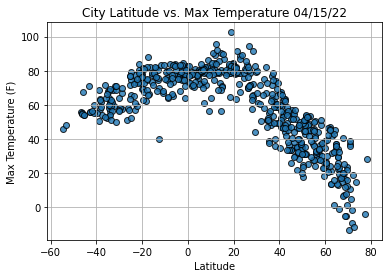

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

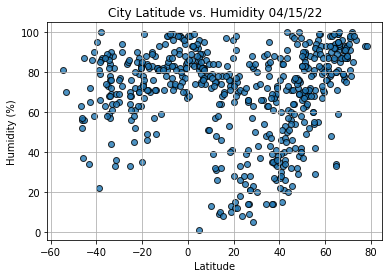

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

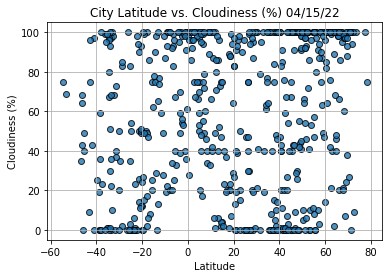

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

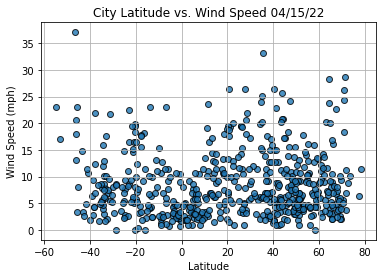

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                       Rawson
Country                        AR
Date          2022-04-15 23:00:52
Lat                      -43.3002
Lng                      -65.1023
Max Temp                    70.86
Humidity                       34
Cloudiness                      9
Wind Speed                  14.81
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
559     True
560     True
561     True
562     True
563    False
Name: Lat, Length: 564, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-04-15 23:00:17,42.6001,-73.9662,63.63,26,59,1.01
1,Kapaa,US,2022-04-15 23:00:48,22.0752,-159.3190,78.48,70,96,5.01
3,College,US,2022-04-15 23:00:48,64.8569,-147.8028,37.29,34,46,4.00
4,Yellowknife,CA,2022-04-15 23:00:48,62.4560,-114.3525,21.56,48,100,8.99
5,Axim,GH,2022-04-15 23:00:49,4.8699,-2.2405,80.01,84,59,7.63


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

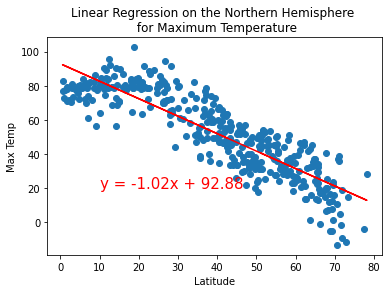

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,20))

# Save the figure.
#plt.savefig("weather_data/Fig5.png")

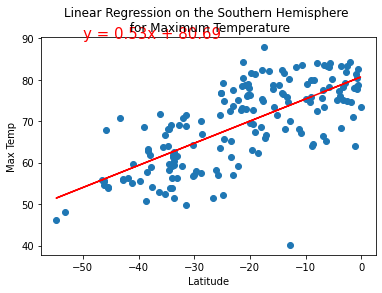

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

#plt.savefig('weather_data/Fig6.png')

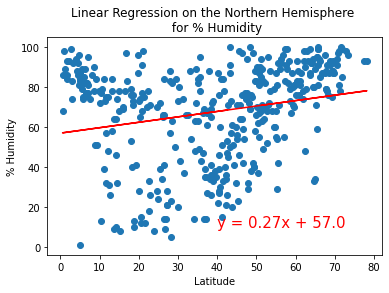

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

#plt.savefig('weather_data/Fig7.png')

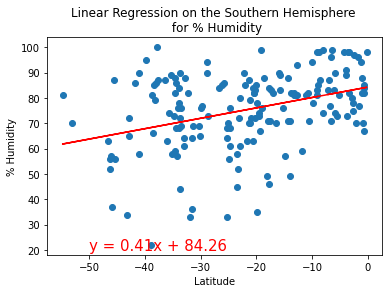

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,20))

#plt.savefig('weather_data/Fig8.png')

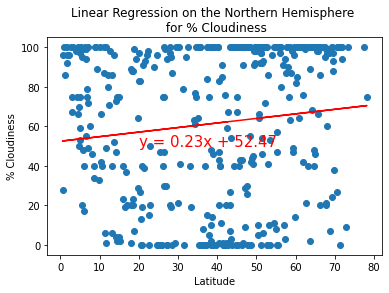

In [28]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(20,50))

#plt.savefig('weather_data/Fig9.png')

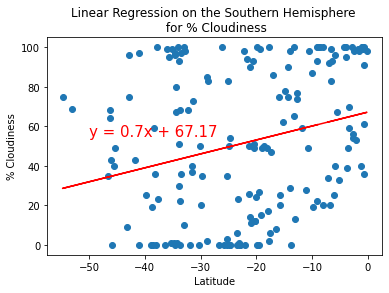

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,55))

#plt.savefig('weather_data/Fig10.png')

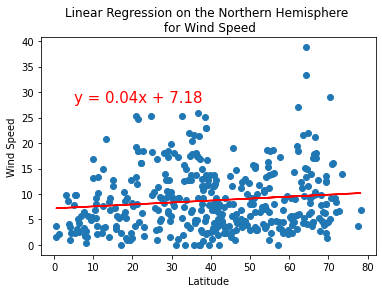

<Figure size 432x288 with 0 Axes>

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(5,28))

#plt.savefig('weather_data/Fig11.png')

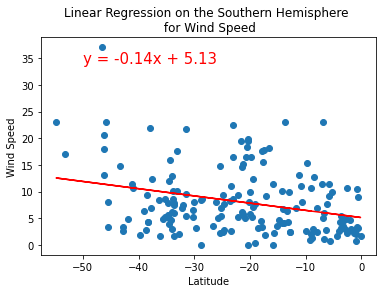

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,34))

#plt.savefig('weather_data/Fig12.png')